**Q-11.** Given the data of a feature contributing to different classes

https://drive.google.com/file/d/1mCjtYHiX--mMUjicuaP2gH3k-SnFxt8Y/view?usp
=share_

**a.** Check whether the distribution of all the classes are the same or not.

**b.** Check for the equality of variance/

**c.** Which amount LDA and QDA would perform better on this data for
classification and why.

**d.** Check the equality of mean for between all the classes.

In [1]:
import pandas as pd

#Download datset to Present working directory and load the dataset

data=pd.read_csv('BPdata.csv')

df=pd.DataFrame(data)

df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


array([[<AxesSubplot: title={'center': ' Blood Pressure After (mmHg)'}>]],
      dtype=object)

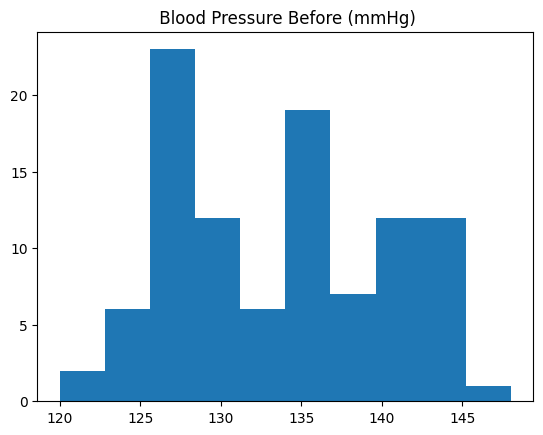

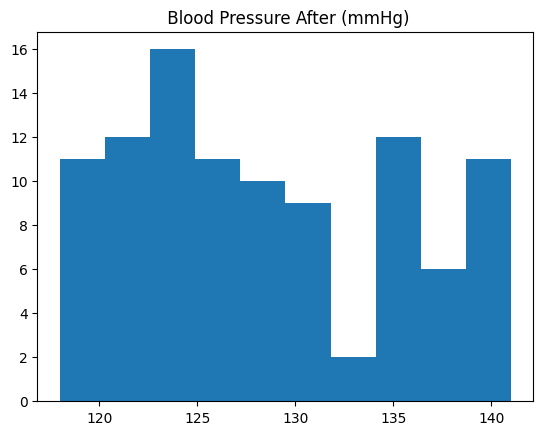

In [2]:
# a. Checking the distribution of all the classes

# Visualizing the data using histograms for each class

df.hist(column=' Blood Pressure Before (mmHg)', by=None, grid=False)

df.hist(column=' Blood Pressure After (mmHg)', by=None, grid=False)

In [3]:
# b. Checking the equality of variance

# Calculating the variance of each class

from scipy import stats

variance_before = df[' Blood Pressure Before (mmHg)'].var()

variance_after = df[' Blood Pressure After (mmHg)'].var()

# Performing Levene's test for equality of variance

levene_result = stats.levene(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])

p_value = levene_result.pvalue

print("Levene's Test Statistic:", levene_result.statistic)

print("Levene's Test p-value:", levene_result.pvalue)

Levene's Test Statistic: 0.18038002140150966
Levene's Test p-value: 0.6715080090945376


    As the p-value(0.67) is greater than a chosen significance level (e.g., 0.05), it suggests that the variances are significantly not different.

In [4]:
# c. Comparison of LDA and QDA for classification

# Assuming you have the target variable representing the classes

X = df[[' Blood Pressure Before (mmHg)', ' Blood Pressure After (mmHg)']]

y = [0, 1] * 50  # Assuming binary classes (alternating 0 and 1 for demonstration purposes)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Performing cross-validation and comparing the accuracy of LDA and QDA

lda = LinearDiscriminantAnalysis()

qda = QuadraticDiscriminantAnalysis()

lda_scores = cross_val_score(lda, X, y, cv=5)

qda_scores = cross_val_score(qda, X, y, cv=5)

mean_lda_accuracy = lda_scores.mean()

mean_qda_accuracy = qda_scores.mean()

print("Comparison of LDA and QDA for classification:")

print("Mean Accuracy of LDA:", mean_lda_accuracy)

print("Mean Accuracy of QDA:", mean_qda_accuracy)

Comparison of LDA and QDA for classification:
Mean Accuracy of LDA: 0.51
Mean Accuracy of QDA: 0.49000000000000005


In [5]:
# d. Checking the equality of mean between all the classes

# Performing ANOVA test for equality of means

anova_result = stats.f_oneway(df[' Blood Pressure Before (mmHg)'], df[' Blood Pressure After (mmHg)'])

p_value_anova = anova_result.pvalue

print("Equality of Variance:")

print("Variance of Blood Pressure Before:", variance_before)

print("Variance of Blood Pressure After:", variance_after)

print("Levene's Test p-value:", p_value)

print("\nEquality of Mean (ANOVA Test):")

print("ANOVA Test p-value:", p_value_anova)

Equality of Variance:
Variance of Blood Pressure Before: 43.53727272727272
Variance of Blood Pressure After: 47.44484848484848
Levene's Test p-value: 0.6715080090945376

Equality of Mean (ANOVA Test):
ANOVA Test p-value: 2.3565868442707578e-08


    Since the p-value is less than the commonly chosen significance level of 0.05, we reject the null hypothesis. This means that we have enough evidence to conclude that there is a significant difference in means among the groups.